In [2]:
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33037 sha256=db00a30a1e25cdc72461976885ba7adcd856fbcfc4464b6c28924a168bd1844b
  Stored in directory: c:\users\hakan\appdata\local\pip\cache\wheels\25\de\d4\29dfc5d4520b956df7bc54a8464ad053042918bc525e88bf66
Successfully built matplotlib-venn


In [4]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from math import pi
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

### Matrix and Bar Plots (Missingno)

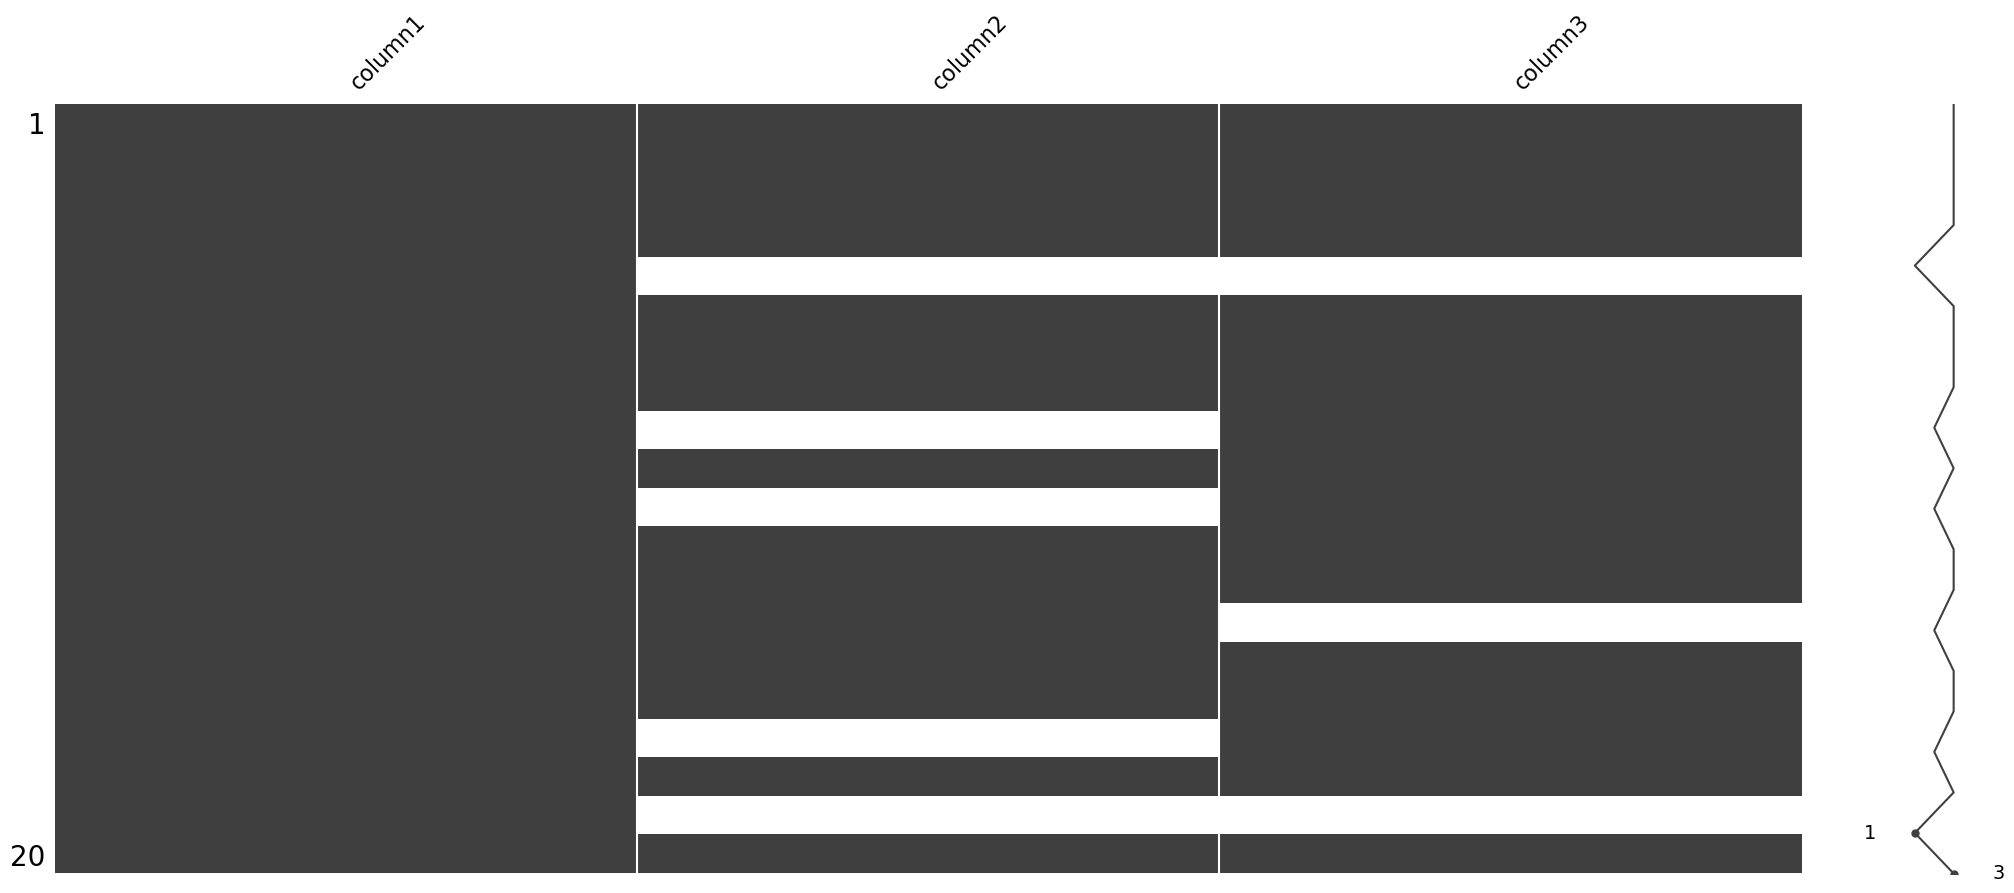

In [8]:
# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary) 

# import missingno library
import missingno as msno
msno.matrix(data_missingno)
plt.show()

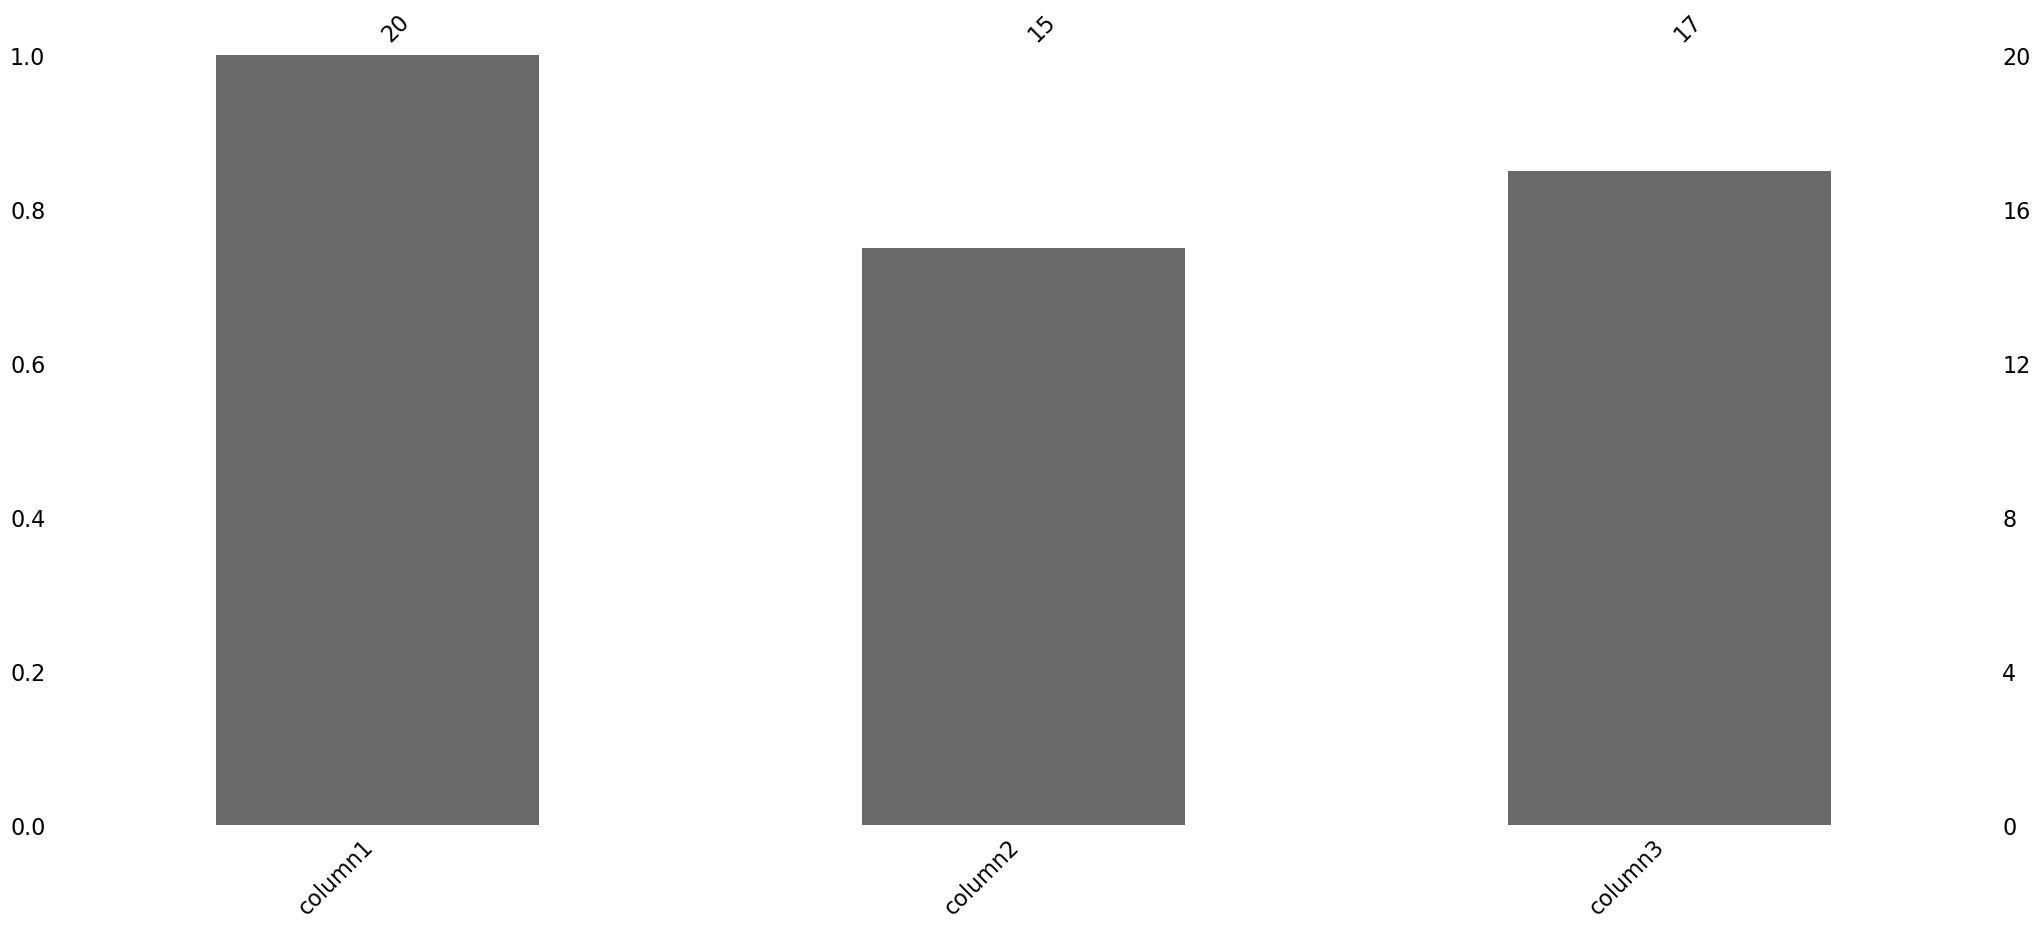

In [9]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

### Parallel Plots (Pandas)

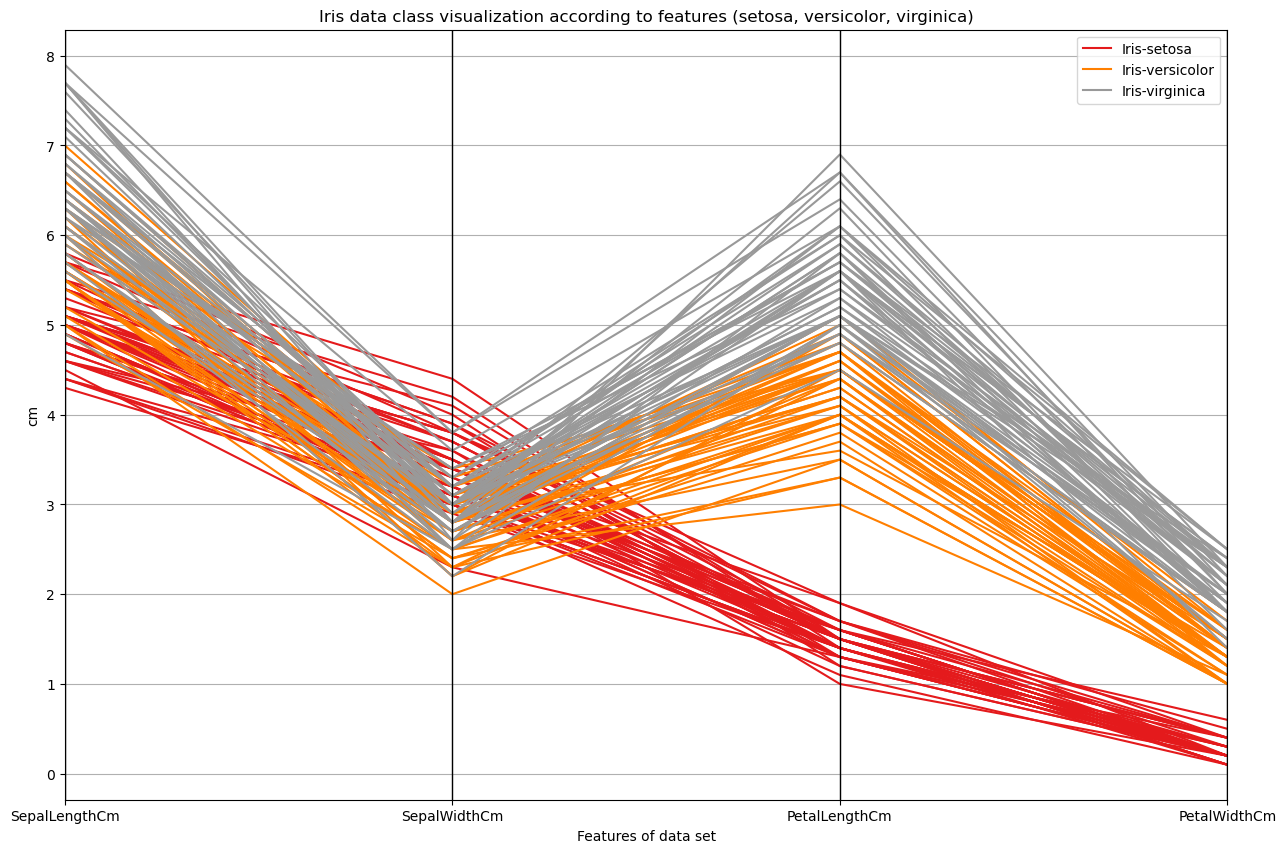

In [22]:
# load iris data
data = pd.read_csv('Iris.csv')
data = data.drop(['Id'],axis=1)
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

### Network Charts (networkx)

In [23]:
# Calculate the correlation between individuals.
corr = data.iloc[:,0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


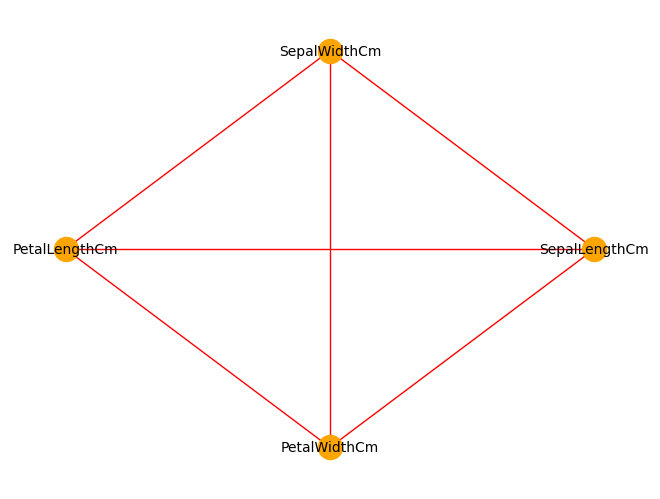

In [24]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# correlation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', 'value')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)

### Venn Diagram (matplotlib)

In [25]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


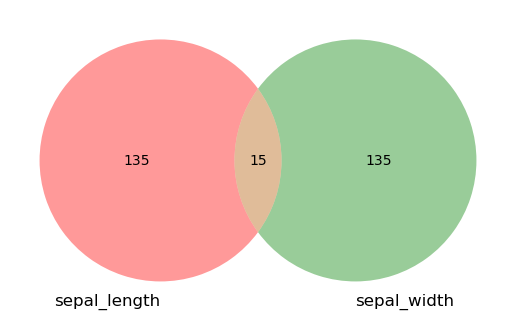

In [26]:
# venn2
from matplotlib_venn import venn2
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_length = data.iloc[:,2]
petal_width = data.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

### Donut Plot (matplotlib)

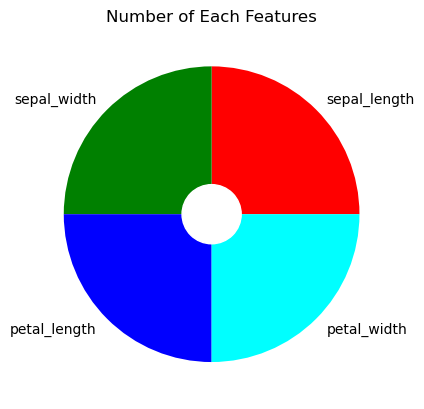

In [27]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

### Spyder Chart (matplotlib)

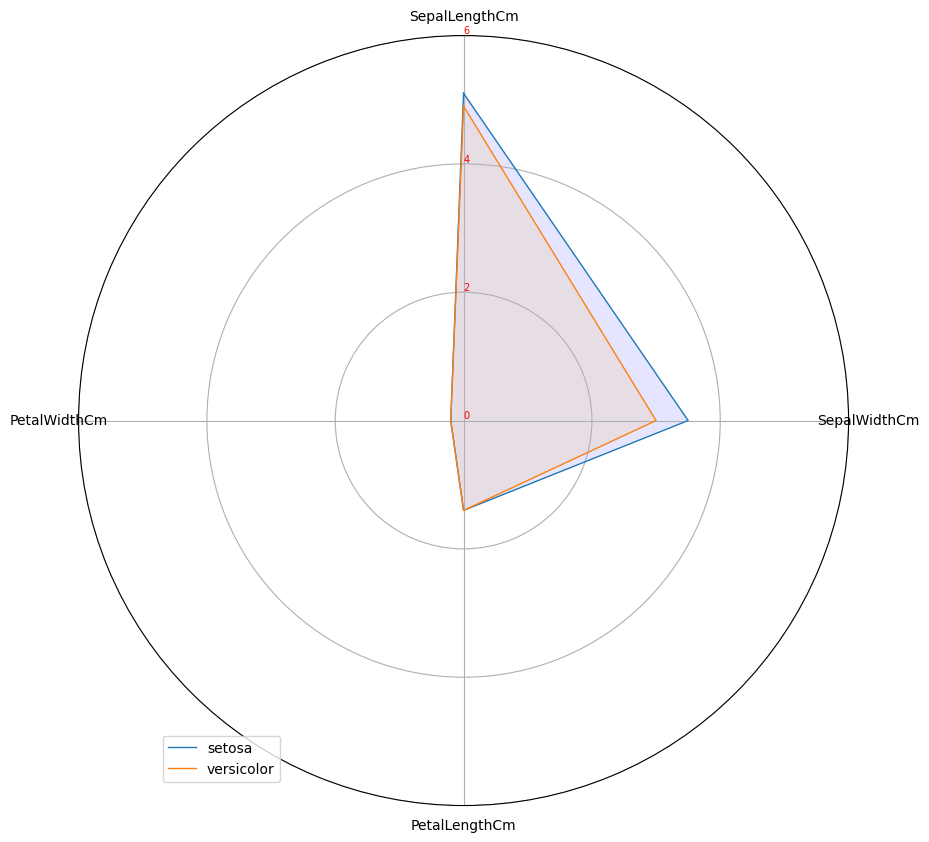

In [28]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

### Cluster Map (seaborn)

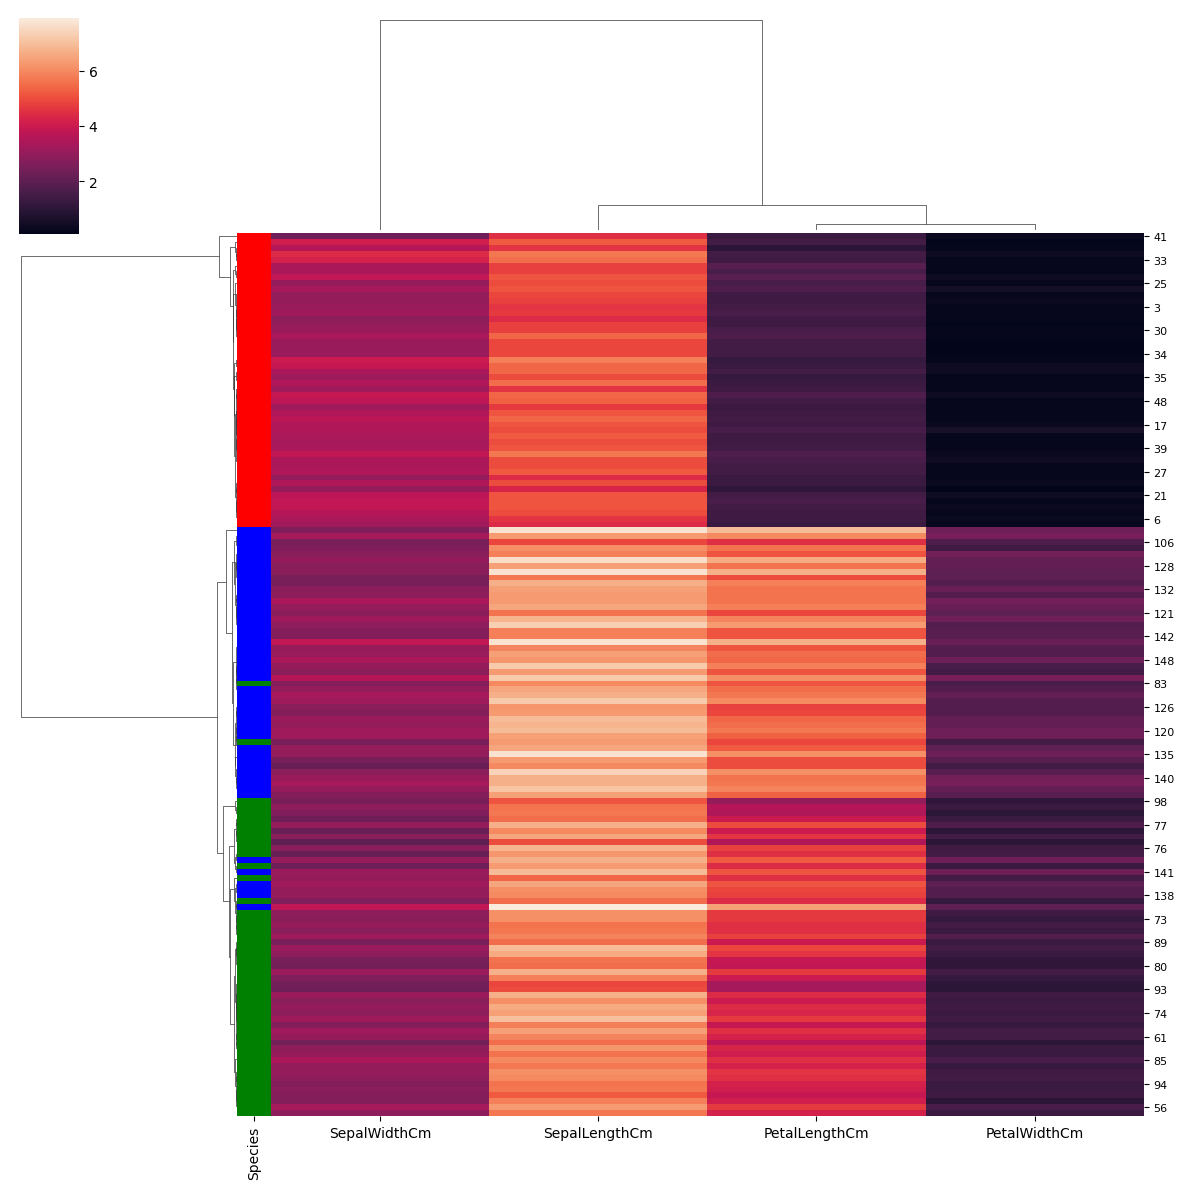

In [29]:
# cluster map (dendogram and tree)
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

### Inset Plot (plotly)

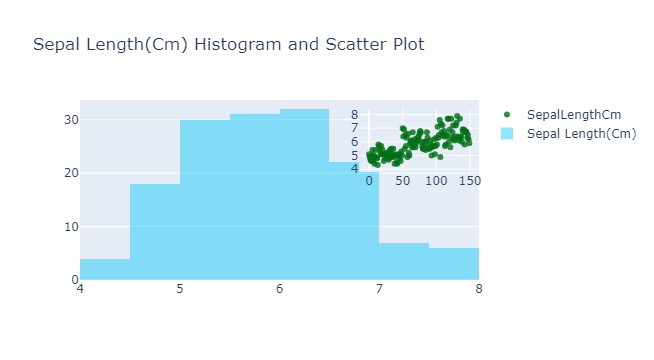

In [30]:
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "SepalLengthCm",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name = "Sepal Length(Cm)",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' Sepal Length(Cm) Histogram and Scatter Plot'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 3D Plot (plotly)

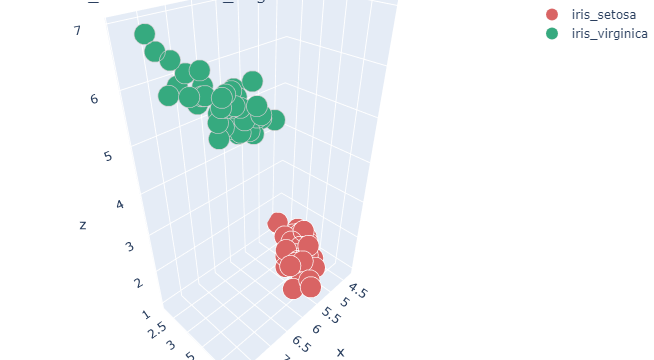

In [31]:
# import data again
data = pd.read_csv('Iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)